In [1]:
import nltk

In [3]:
#nltk.download_shell()

In [4]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
for msgno, message in enumerate(messages[:10]):
    print(msgno, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [7]:
import pandas as pd

In [15]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['labels', 'message'])

In [16]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [19]:
messages['length'] = messages['message'].apply(len)

In [20]:
messages

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:ylabel='Frequency'>

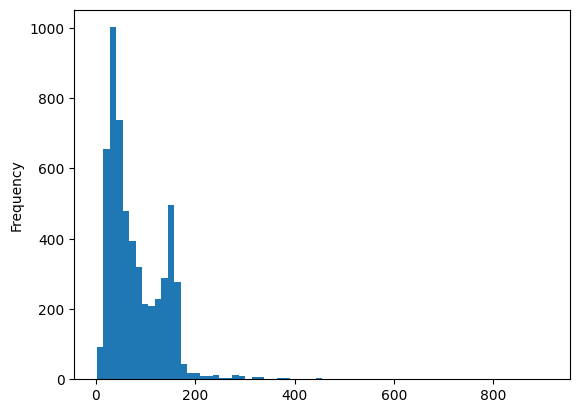

In [30]:
messages['length'].plot.hist(bins=70)

In [31]:
messages.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [33]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

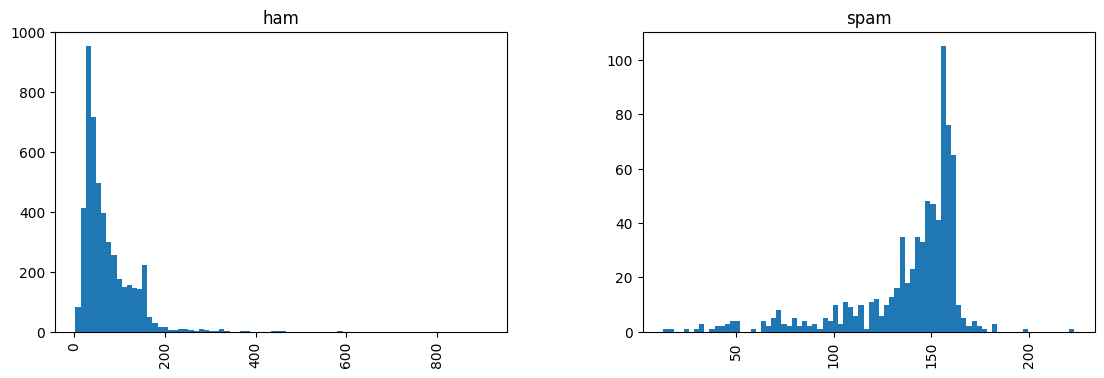

In [35]:
messages.hist(column='length', by='labels', bins=80, figsize=(13,4))

In [36]:
import string

In [37]:
from nltk.corpus import stopwords

In [41]:
def text_process(mess):
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc = "".join(nopunc)
    clean_mess = [word for word in nopunc.split() if word.lower() not in set(stopwords.words('english'))]
    return clean_mess

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [44]:
messages_bow = bow_transformer.transform(messages['message'])

In [45]:
messages_bow.shape

(5572, 11425)

In [46]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [47]:
from sklearn.feature_extraction.text import TfidfTransformer

In [49]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [51]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['labels'])

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['labels'], test_size=0.3)

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [59]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021EE6C5ADD0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [62]:
predictions = pipeline.predict(msg_test)

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(label_test, predications))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1440
        spam       1.00      0.67      0.80       232

    accuracy                           0.95      1672
   macro avg       0.97      0.83      0.89      1672
weighted avg       0.96      0.95      0.95      1672

